<a href="https://colab.research.google.com/github/jithesh9539/Alternus_Veras_Assignment_NLP/blob/main/Jithesh_Alternus_Vera.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
import pandas as pd
import numpy as np
import csv
import gensim
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from nltk.stem.wordnet import WordNetLemmatizer
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from nltk.stem.porter import PorterStemmer
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.pipeline import Pipeline
from nltk.corpus import stopwords
from string import punctuation
import seaborn as sns
import pandas as pd
import numpy as np
import nltk
import re
import nltk
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
import matplotlib.pyplot as plt
from scipy import sparse

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [34]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [35]:
path="/content/drive/MyDrive/ML-Spring-2022/AlternusVera/"
data_train=pd.read_csv(path + "train.tsv" , sep='\t' )

In [36]:
path="/content/drive/MyDrive/ML-Spring-2022/AlternusVera/"
data_test=pd.read_csv(path + "test.tsv" , sep='\t' )
#!ls /content/drive/MyDrive/ML-Spring-2022

In [37]:
path="/content/drive/MyDrive/ML-Spring-2022/AlternusVera/"
data_valid=pd.read_csv(path + "valid.tsv" , sep='\t' )

In [38]:
data_train.head()

,2635.json,false,Says the Annies List political group supports third-trimester abortions on demand.,abortion,dwayne-bohac,State representative,Texas,republican,0,1,0.1,0.2,0.3,a mailer
0,10540.json,half-true,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0.0,0.0,1.0,1.0,0.0,a floor speech.
1,324.json,mostly-true,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,Denver
2,1123.json,false,Health care reform legislation is likely to ma...,health-care,blog-posting,NaN,NaN,none,7.0,19.0,3.0,5.0,44.0,a news release
3,9028.json,half-true,The economic turnaround started at the end of ...,"economy,jobs",charlie-crist,NaN,Florida,democrat,15.0,9.0,20.0,19.0,2.0,an interview on CNN
4,12465.json,true,The Chicago Bears have had more starting quart...,education,robin-vos,Wisconsin Assembly speaker,Wisconsin,republican,0.0,3.0,2.0,5.0,1.0,a an online opinion-piece


In [39]:
data_train.columns= ['jsonid', 'label', 'headline_text', 'subject', 'speaker', 'speakerjobtitle', 'stateinfo','partyaffiliation', 'barelytruecounts', 'falsecounts','halftruecounts','mostlytrueocunts','pantsonfirecounts','context']
data_test.columns= ['jsonid', 'label', 'headline_text', 'subject', 'speaker', 'speakerjobtitle', 'stateinfo','partyaffiliation', 'barelytruecounts', 'falsecounts','halftruecounts','mostlytrueocunts','pantsonfirecounts','context']
data_valid.columns= ['jsonid', 'label', 'headline_text', 'subject', 'speaker', 'speakerjobtitle', 'stateinfo','partyaffiliation', 'barelytruecounts', 'falsecounts','halftruecounts','mostlytrueocunts','pantsonfirecounts','context']

In [40]:
data_test.head()

,jsonid,label,headline_text,subject,speaker,speakerjobtitle,stateinfo,partyaffiliation,barelytruecounts,falsecounts,halftruecounts,mostlytrueocunts,pantsonfirecounts,context
0,11685.json,false,Wisconsin is on pace to double the number of l...,jobs,katrina-shankland,State representative,Wisconsin,democrat,2,1,0,0,0,a news conference
1,11096.json,false,Says John McCain has done nothing to help the ...,"military,veterans,voting-record",donald-trump,President-Elect,New York,republican,63,114,51,37,61,comments on ABC's This Week.
2,5209.json,half-true,Suzanne Bonamici supports a plan that will cut...,"medicare,message-machine-2012,campaign-adverti...",rob-cornilles,consultant,Oregon,republican,1,1,3,1,1,a radio show
3,9524.json,pants-fire,When asked by a reporter whether hes at the ce...,"campaign-finance,legal-issues,campaign-adverti...",state-democratic-party-wisconsin,NaN,Wisconsin,democrat,5,7,2,2,7,a web video
4,5962.json,true,Over the past five years the federal governmen...,"federal-budget,pensions,retirement",brendan-doherty,NaN,Rhode Island,republican,1,2,1,1,0,a campaign website


In [41]:
data_valid.head()

,jsonid,label,headline_text,subject,speaker,speakerjobtitle,stateinfo,partyaffiliation,barelytruecounts,falsecounts,halftruecounts,mostlytrueocunts,pantsonfirecounts,context
0,238.json,pants-fire,"When Obama was sworn into office, he DID NOT u...","obama-birth-certificate,religion",chain-email,NaN,NaN,none,11,43,8,5,105,NaN
1,7891.json,false,Says Having organizations parading as being so...,"campaign-finance,congress,taxes",earl-blumenauer,U.S. representative,Oregon,democrat,0,1,1,1,0,a U.S. Ways and Means hearing
2,8169.json,half-true,Says nearly half of Oregons children are poor.,poverty,jim-francesconi,Member of the State Board of Higher Education,Oregon,none,0,1,1,1,0,an opinion article
3,929.json,half-true,On attacks by Republicans that various program...,"economy,stimulus",barack-obama,President,Illinois,democrat,70,71,160,163,9,interview with CBS News
4,9416.json,false,Says when armed civilians stop mass shootings ...,guns,jim-rubens,Small business owner,New Hampshire,republican,1,1,0,1,0,"in an interview at gun shop in Hudson, N.H."


In [42]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10239 entries, 0 to 10238
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   jsonid             10239 non-null  object 
 1   label              10239 non-null  object 
 2   headline_text      10239 non-null  object 
 3   subject            10237 non-null  object 
 4   speaker            10237 non-null  object 
 5   speakerjobtitle    7342 non-null   object 
 6   stateinfo          8031 non-null   object 
 7   partyaffiliation   10237 non-null  object 
 8   barelytruecounts   10237 non-null  float64
 9   falsecounts        10237 non-null  float64
 10  halftruecounts     10237 non-null  float64
 11  mostlytrueocunts   10237 non-null  float64
 12  pantsonfirecounts  10237 non-null  float64
 13  context            10137 non-null  object 
dtypes: float64(5), object(9)
memory usage: 1.1+ MB


In [43]:
data_train.shape

(10239, 14)

In [44]:
data_test.shape

(1266, 14)

In [45]:
data_valid.shape

(1283, 14)

**Data Cleaning and Preprocessing**

It is used to preprocess the text by removing special characters and punctuations. Lower case the news, removing the stop words,stemming and lemmatization

In [46]:
import re

def cleaning(raw_news):
    import nltk
    
    # 1. Remove non-letters/Special Characters and Punctuations
    news = re.sub("[^a-zA-Z]", " ", raw_news)
    
    # 2. Convert to lower case.
    news =  news.lower()
    
    # 3. Tokenize.
    news_words = nltk.word_tokenize( news)
    
    # 4. Convert the stopwords list to "set" data type.
    stops = set(nltk.corpus.stopwords.words("english"))
    
    # 5. Remove stop words. 
    words = [w for w in  news_words  if not w in stops]
    
    # 6. Lemmentize 
    wordnet_lem = [ WordNetLemmatizer().lemmatize(w) for w in words ]
    
    # 7. Stemming
    stems = [nltk.stem.SnowballStemmer('english').stem(w) for w in wordnet_lem ]
    
    # 8. Join the stemmed words back into one string separated by space, and return the result.
    return " ".join(stems)

In [47]:
from nltk.tokenize import punkt
import nltk
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [48]:
import time
# clean training and test data 
# create new column "tokenized"
t1 = time.time()

In [49]:
data_valid

,jsonid,label,headline_text,subject,speaker,speakerjobtitle,stateinfo,partyaffiliation,barelytruecounts,falsecounts,halftruecounts,mostlytrueocunts,pantsonfirecounts,context
0,238.json,pants-fire,"When Obama was sworn into office, he DID NOT u...","obama-birth-certificate,religion",chain-email,NaN,NaN,none,11,43,8,5,105,NaN
1,7891.json,false,Says Having organizations parading as being so...,"campaign-finance,congress,taxes",earl-blumenauer,U.S. representative,Oregon,democrat,0,1,1,1,0,a U.S. Ways and Means hearing
2,8169.json,half-true,Says nearly half of Oregons children are poor.,poverty,jim-francesconi,Member of the State Board of Higher Education,Oregon,none,0,1,1,1,0,an opinion article
3,929.json,half-true,On attacks by Republicans that various program...,"economy,stimulus",barack-obama,President,Illinois,democrat,70,71,160,163,9,interview with CBS News
4,9416.json,false,Says when armed civilians stop mass shootings ...,guns,jim-rubens,Small business owner,New Hampshire,republican,1,1,0,1,0,"in an interview at gun shop in Hudson, N.H."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1278,3419.json,half-true,"For the first time in more than a decade, impo...","energy,oil-spill,trade",barack-obama,President,Illinois,democrat,70,71,160,163,9,a press conference
1279,12548.json,mostly-true,Says Donald Trump has bankrupted his companies...,candidates-biography,hillary-clinton,Presidential candidate,New York,democrat,40,29,69,76,7,a speech on the economy
1280,401.json,true,"John McCain and George Bush have ""absolutely n...",health-care,campaign-defend-america,NaN,"Washington, D.C.",none,0,1,0,2,0,a television ad
1281,1055.json,false,A new poll shows 62 percent support the presid...,health-care,americans-united-change,NaN,NaN,none,1,4,4,1,0,an Internet ad.


In [50]:
# Add the processed data to the original data. 
# Perhaps using apply function would be more elegant and concise than using for loop
#data_train['clean'] = data_train["headline_text"].apply(cleaning) 

t2 = time.time()
data_train['clean'] = data_train["headline_text"].apply(cleaning)
t1 = time.time()
print("\nTime to clean, tokenize and stem train data: \n", len(data_train), "news:", (t1-t2)/60, "min")


t2 = time.time()
data_test['clean'] = data_test["headline_text"].apply(cleaning)
t1 = time.time()
print("\n\nTime to clean, tokenize and stem test data: \n", len(data_test), "news:", (t1-t2)/60, "min")

t2 = time.time()
data_valid['clean'] = data_valid["headline_text"].apply(cleaning)
t1 = time.time()
print("\n\nTime to clean, tokenize and stem valid data: \n", len(data_valid), "news:", (t1-t2)/60, "min")




Time to clean, tokenize and stem train data: 
 10239 news: 0.12402724424997966 min


Time to clean, tokenize and stem test data: 
 1266 news: 0.015500450134277343 min


Time to clean, tokenize and stem valid data: 
 1283 news: 0.014101457595825196 min


In [51]:
#model = gensim.models.KeyedVectors.load_word2vec_format('input_data/GoogleNews-vectors-negative300.bin.gz', binary=True)
model = gensim.models.KeyedVectors.load_word2vec_format('/content/drive/MyDrive/ML-Spring-2022/DataMarvels/Alternus_Veras/GoogleNews-vectors-negative300.bin.gz', binary=True)
words = model.index2word

w_rank = {}
for i,word in enumerate(words):
    w_rank[word] = i

WORDS = w_rank

In [52]:
import re
from collections import Counter

def words(text): return re.findall(r'\w+', text.lower())

def P(word, N=sum(WORDS.values())): 
    "Probability of `word`."
    return - WORDS.get(word, 0)

def correction(word): 
    "Most probable spelling correction for word."
    return max(candidates(word), key=P)

def candidates(word): 
    "Generate possible spelling corrections for word."
    return (known([word]) or known(edits1(word)) or known(edits2(word)) or [word])

def known(words): 
    "The subset of `words` that appear in the dictionary of WORDS."
    return set(w for w in words if w in WORDS)

def edits1(word):
    "All edits that are one edit away from `word`."
    letters    = 'abcdefghijklmnopqrstuvwxyz'
    splits     = [(word[:i], word[i:])    for i in range(len(word) + 1)]
    deletes    = [L + R[1:]               for L, R in splits if R]
    transposes = [L + R[1] + R[0] + R[2:] for L, R in splits if len(R)>1]
    replaces   = [L + c + R[1:]           for L, R in splits if R for c in letters]
    inserts    = [L + c + R               for L, R in splits for c in letters]
    return set(deletes + transposes + replaces + inserts)

def edits2(word): 
    "All edits that are two edits away from `word`."
    return (e2 for e1 in edits1(word) for e2 in edits1(e1))

In [53]:
def spell_checker(text):
    all_words = re.findall(r'\w+', text.lower()) # split sentence to words
    spell_checked_text  = []
    for i in range(len(all_words)):
        spell_checked_text.append(correction(all_words[i]))
    return ' '.join(spell_checked_text)

In [54]:
print("Before: \n", data_train['clean'][0] )
t1 = time.time()
data_train['clean'] = data_train['clean'].apply(spell_checker)
t2 = time.time()
print("\nTime to spell check the train data: \n", len(data_train), "news:", (t2-t1)/60, "min")

print("\nAfter: \n",data_train['clean'][0] )
data_train.head(5)

Before: 
 declin coal start start natur gas took start begin presid georg w bush administr

Time to spell check the train data: 
 10239 news: 6.03747687737147 min

After: 
 decline coal start start natur gas took start begin presid george w bush administr


,jsonid,label,headline_text,subject,speaker,speakerjobtitle,stateinfo,partyaffiliation,barelytruecounts,falsecounts,halftruecounts,mostlytrueocunts,pantsonfirecounts,context,clean
0,10540.json,half-true,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0.0,0.0,1.0,1.0,0.0,a floor speech.,decline coal start start natur gas took start ...
1,324.json,mostly-true,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,Denver,hillary clinton agre john mccain vote give geo...
2,1123.json,false,Health care reform legislation is likely to ma...,health-care,blog-posting,NaN,NaN,none,7.0,19.0,3.0,5.0,44.0,a news release,health care reform legis like mandat free sex ...
3,9028.json,half-true,The economic turnaround started at the end of ...,"economy,jobs",charlie-crist,NaN,Florida,democrat,15.0,9.0,20.0,19.0,2.0,an interview on CNN,econom turnaround start end term
4,12465.json,true,The Chicago Bears have had more starting quart...,education,robin-vos,Wisconsin Assembly speaker,Wisconsin,republican,0.0,3.0,2.0,5.0,1.0,a an online opinion-piece,chicago bear start quarterback last year total...


In [55]:
t1 = time.time()
data_test['clean'] = data_test['clean'].apply(spell_checker)
data_test.head(5)
t2 = time.time()
print("\nTime to spell check the test data: \n", len(data_test), "news:", (t2-t1)/60, "min")


Time to spell check the test data: 
 1266 news: 0.6879884521166484 min


In [56]:
print("Before: \n", data_valid['clean'][0] )
t1 = time.time()
data_valid['clean'] = data_valid['clean'].apply(spell_checker)
t2 = time.time()
print("\nTime to spell check the train data: \n", len(data_train), "news:", (t2-t1)/60, "min")

print("\nAfter: \n",data_valid['clean'][0] )
data_valid.head(5)

Before: 
 obama sworn offic use holi bibl instead kuran equival bibl differ belief

Time to spell check the train data: 
 10239 news: 0.7466509540875753 min

After: 
 obama sworn offic use holi bill instead kura equiva bill differ belief


,jsonid,label,headline_text,subject,speaker,speakerjobtitle,stateinfo,partyaffiliation,barelytruecounts,falsecounts,halftruecounts,mostlytrueocunts,pantsonfirecounts,context,clean
0,238.json,pants-fire,"When Obama was sworn into office, he DID NOT u...","obama-birth-certificate,religion",chain-email,NaN,NaN,none,11,43,8,5,105,NaN,obama sworn offic use holi bill instead kura e...
1,7891.json,false,Says Having organizations parading as being so...,"campaign-finance,congress,taxes",earl-blumenauer,U.S. representative,Oregon,democrat,0,1,1,1,0,a U.S. Ways and Means hearing,say organ parade social welfare organ involv p...
2,8169.json,half-true,Says nearly half of Oregons children are poor.,poverty,jim-francesconi,Member of the State Board of Higher Education,Oregon,none,0,1,1,1,0,an opinion article,say near half oregon child poor
3,929.json,half-true,On attacks by Republicans that various program...,"economy,stimulus",barack-obama,President,Illinois,democrat,70,71,160,163,9,interview with CBS News,attack republican various program econom stimu...
4,9416.json,false,Says when armed civilians stop mass shootings ...,guns,jim-rubens,Small business owner,New Hampshire,republican,1,1,0,1,0,"in an interview at gun shop in Hudson, N.H.",say arm civilian stop mass shoot gun averag pe...


**Visualization(The words that are appearing large in the below visualizations of train,test and valid data are the most frequent words that are appearing in the texts**

In [57]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

%matplotlib inline

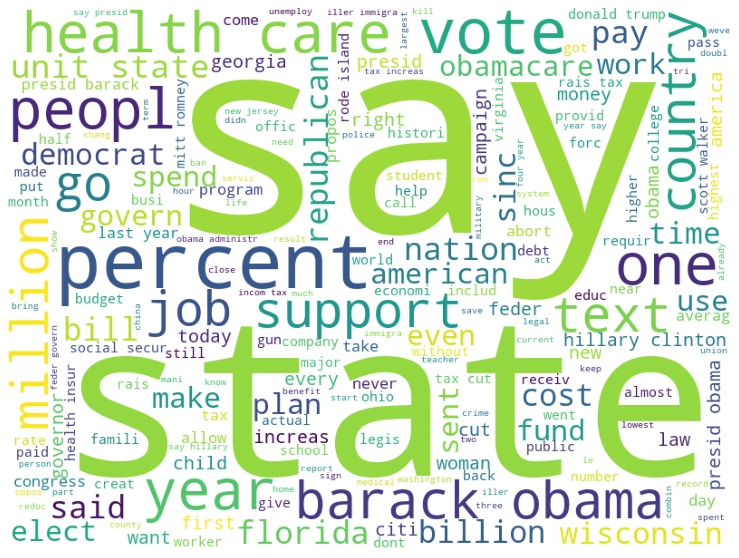

In [58]:
def cloud(data,backgroundcolor = 'white', width = 800, height = 600):
    wordcloud = WordCloud(stopwords = STOPWORDS, background_color = backgroundcolor,
                         width = width, height = height).generate(data)
    plt.figure(figsize = (15, 10))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()
    
cloud(' '.join(data_train['clean']))

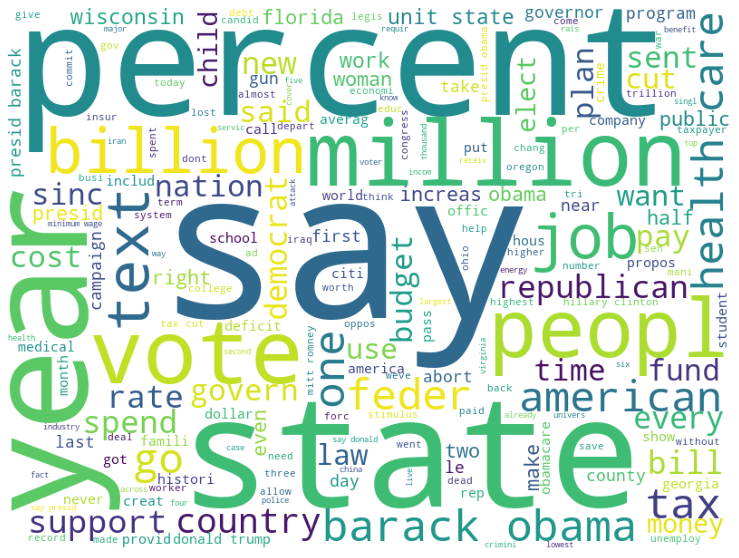

In [59]:

cloud(' '.join(data_test['clean']))

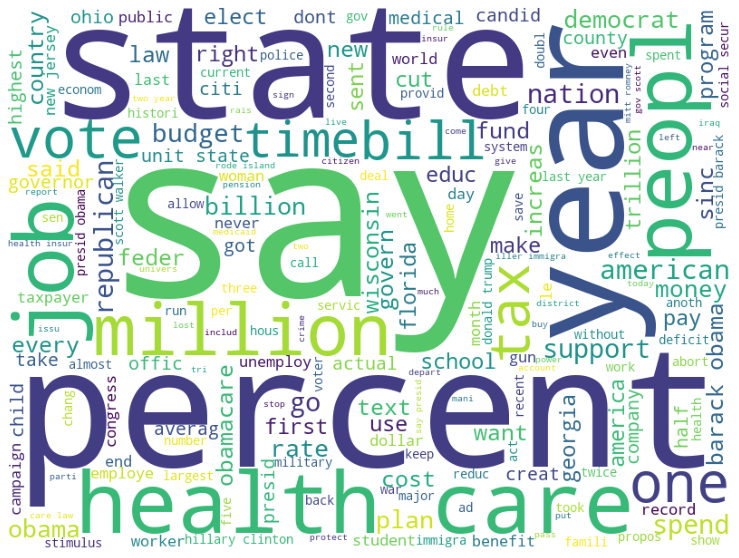

In [60]:
cloud(' '.join(data_valid['clean']))

**LDA_Topic_Modelling**

In [61]:
data_train['index'] = data_train.index
data = data_train
data_train_lda = data[['clean', 'index']]
data_train_lda.head(4)

,clean,index
0,decline coal start start natur gas took start ...,0
1,hillary clinton agre john mccain vote give geo...,1
2,health care reform legis like mandat free sex ...,2
3,econom turnaround start end term,3


In [62]:
data_test['index'] = data_test.index
data = data_test
data_test_lda = data[['clean', 'index']]
data_test_lda.head(4)

,clean,index
0,wisconsin pace doubl number layoff year,0
1,say john mccain done noth help vet,1
2,suzanne bonamici support plan cut choice medic...,2
3,ask report whether he center crimini scheme vi...,3


In [63]:
data_valid['index'] = data_valid.index
data = data_valid
data_valid_lda = data[['clean', 'index']]
data_valid_lda.head(4)

,clean,index
0,obama sworn offic use holi bill instead kura e...,0
1,say organ parade social welfare organ involv p...,1
2,say near half oregon child poor,2
3,attack republican various program econom stimu...,3


**Split the clean news into list of words**

In [64]:
processed_docs = data_train_lda['clean'].map(lambda doc: doc.split(" "))
processed_docs[:4]

0    [decline, coal, start, start, natur, gas, took...
1    [hillary, clinton, agre, john, mccain, vote, g...
2    [health, care, reform, legis, like, mandat, fr...
3               [econom, turnaround, start, end, term]
Name: clean, dtype: object

In [65]:
def get_word_tokens(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if len(token) > 3:
            result.append(token)
    return result
tokenized_docs_local = data_train['clean'].map(get_word_tokens)

**Creating a function to build the dictionary and tokenized docs for given feature**

In [66]:
def get_dictionary_print_words(dataframe,colname):
    dictionary_gensim = gensim.corpora.Dictionary(processed_docs)
    count = 0
    print('######## DICTIONARY Words and occurences ########')
    for k, v in dictionary_gensim.iteritems():
        print(k, v)
        count += 1
        if count > 10:
            break
    dictionary_gensim.filter_extremes(no_below=15, no_above=0.5, keep_n=100000)
    return dictionary_gensim, tokenized_docs_local

**Create a function to build bow_corpus from dictionary and tokenized_doc**

In [67]:
def get_bow_corpus_print_sample(dataframe,colname):
    dictionary_gensim, tokenized_docs_local = get_dictionary_print_words(dataframe, colname)
    bow_corpus_local = [dictionary_gensim.doc2bow(doc) for doc in tokenized_docs_local]
    bow_doc_local_0 = bow_corpus_local[0]
    print('\n ######## BOW VECTOR FIRST ITEM ########')
    print(bow_doc_local_0)
    print('\n ######## PREVIEW BOW ########')
    for i in range(len(bow_doc_local_0)):
        print("Word {} (\"{}\") appears {} time.".format(bow_doc_local_0[i][0], 
                                               dictionary_gensim[bow_doc_local_0[i][0]], bow_doc_local_0[i][1]))
    return bow_corpus_local, dictionary_gensim

**Create a function to build tfidf_corpus from bow_corpus**

In [68]:
def get_tfidf_corpus_print_sample(bow_corpus_local):
    from gensim import corpora, models
    tfidf = models.TfidfModel(bow_corpus_local)
    tfidf_corpus_local = tfidf[bow_corpus_local]
    print('\n ######## TFIDF VECTOR FIRST ITEM ########')
    
    from pprint import pprint
    for doc in tfidf_corpus_local:
        pprint(doc)
        break
    return tfidf_corpus_local

**Create a function to run ldamodel and print top 10 topics**

In [69]:
def get_lda_model_topics_topwords_print_top_topics(bow_corpusforlda,numtopics,dictionaryforlda):
    lda_model = gensim.models.LdaMulticore(bow_corpusforlda, num_topics=numtopics, id2word=dictionaryforlda, passes=2, workers=2, random_state=1)
    lda_all_topics=lda_model.show_topics(num_topics=numtopics, num_words=10,formatted=False)
    lda_topics_words = [(tp[0], [wd[0] for wd in tp[1]]) for tp in lda_all_topics]

    #Below Code Prints Topics and Words
    for topic,words in lda_topics_words:
        print(str(topic)+ "::"+ str(words))
    return lda_model,lda_topics_words

**Create a function to enrich data with lda topics, lda topics score, top words**

In [70]:
def identify_topic_number_score_label_topwords(text,dictionary_local,lda_model_local,lda_topics_top_words_local):
    bow_vector_local = dictionary_local.doc2bow(get_word_tokens(text))
    topic_number_local, topic_score_local = sorted(
        lda_model_local[bow_vector_local], key=lambda tup: -1*tup[1])[0]
    #print (topic_number_local, topic_score_local)
    return pd.Series([topic_number_local, topic_score_local," ".join(lda_topics_top_words_local[int(topic_number_local)][1])])

**Create a function that can enrich topic data to dataframe**

In [71]:
def update_lda_results_to_dataset(dataframe,topiccolnames,coltoapplylda,colnamedictionary,colnameldamodel, colnameldatopwords):
    dataframe[topiccolnames] = dataframe.apply(
    lambda row: identify_topic_number_score_label_topwords(
        row[coltoapplylda],colnamedictionary,colnameldamodel,
        colnameldatopwords), axis=1)
    return dataframe

**Bag of Words**

**Create a dictionary and tokens**

**Create a function to convert text to word tokens from cleaned dataset**

In [72]:
bow_corpus_headline, dictionary_headline = get_bow_corpus_print_sample(data_train,
                                                                      'clean')

######## DICTIONARY Words and occurences ########
0 administr
1 begin
2 bush
3 coal
4 decline
5 gas
6 george
7 natur
8 presid
9 start
10 took

 ######## BOW VECTOR FIRST ITEM ########
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (6, 1), (7, 1), (8, 1), (9, 3), (10, 1)]

 ######## PREVIEW BOW ########
Word 0 ("administr") appears 1 time.
Word 1 ("begin") appears 1 time.
Word 2 ("bush") appears 1 time.
Word 3 ("coal") appears 1 time.
Word 4 ("decline") appears 1 time.
Word 6 ("george") appears 1 time.
Word 7 ("natur") appears 1 time.
Word 8 ("presid") appears 1 time.
Word 9 ("start") appears 3 time.
Word 10 ("took") appears 1 time.


**Running LDA using Bag of Words**

In [73]:
lda_model_headline, lda_headline_topic_words = get_lda_model_topics_topwords_print_top_topics(
    bow_corpus_headline, 10 ,dictionary_headline)

0::['state', 'govern', 'presid', 'georgia', 'economi', 'said', 'obama', 'school', 'take', 'america']
1::['year', 'percent', 'state', 'text', 'secur', 'social', 'wage', 'peopl', 'last', 'mccain']
2::['health', 'state', 'care', 'year', 'bill', 'said', 'billion', 'unit', 'peopl', 'vote']
3::['percent', 'rate', 'time', 'romney', 'million', 'nation', 'unemploy', 'world', 'state', 'mitt']
4::['would', 'support', 'vote', 'plan', 'bill', 'elect', 'trump', 'cost', 'republican', 'clinton']
5::['percent', 'obama', 'million', 'presid', 'barack', 'peopl', 'year', 'increas', 'citi', 'country']
6::['year', 'obama', 'presid', 'budget', 'barack', 'feder', 'offic', 'state', 'could', 'wisconsin']
7::['american', 'scott', 'state', 'vote', 'debt', 'governor', 'percent', 'walker', 'dollar', 'democrat']
8::['state', 'sent', 'obama', 'would', 'every', 'vote', 'first', 'nation', 'unit', 'year']
9::['percent', 'state', 'iller', 'fund', 'country', 'island', 'rode', 'school', 'health', 'care']


**Generate TF-IDF bow_corpus**

In [74]:
tfidf_corpus_headline = get_tfidf_corpus_print_sample(bow_corpus_headline)


 ######## TFIDF VECTOR FIRST ITEM ########
[(0, 0.1962058496954181),
 (1, 0.2740423130402529),
 (2, 0.19592750925505528),
 (3, 0.2949434970854575),
 (4, 0.29280920831600177),
 (6, 0.228931258666876),
 (7, 0.2949434970854575),
 (8, 0.13542234828434077),
 (9, 0.6901437124390907),
 (10, 0.203098112931803)]


**Running LDA model using Bag of Words**

In [76]:
lda_tfidf_model_headline  = get_lda_model_topics_topwords_print_top_topics(tfidf_corpus_headline,10,dictionary_headline)


0::['economi', 'school', 'text', 'percent', 'govern', 'obama', 'rick', 'presid', 'state', 'number']
1::['year', 'percent', 'secur', 'social', 'wage', 'minimum', 'state', 'incom', 'mccain', 'reagan']
2::['state', 'health', 'care', 'year', 'county', 'bill', 'island', 'said', 'forc', 'rode']
3::['rate', 'time', 'percent', 'state', 'border', 'parti', 'obamacare', 'presid', 'vote', 'mexico']
4::['support', 'elect', 'billion', 'vote', 'percent', 'congress', 'romney', 'year', 'marriage', 'state']
5::['percent', 'obama', 'million', 'citi', 'abort', 'barack', 'year', 'peopl', 'energy', 'austin']
6::['presid', 'obama', 'year', 'feder', 'state', 'barack', 'medical', 'propos', 'budget', 'govern']
7::['american', 'debt', 'scott', 'state', 'fund', 'percent', 'billion', 'rais', 'million', 'dollar']
8::['state', 'year', 'first', 'sent', 'obama', 'vote', 'budget', 'woman', 'would', 'presid']
9::['percent', 'iller', 'state', 'care', 'health', 'year', 'immigra', 'country', 'highest', 'famili']


**Semisupervised Labeling**

In [77]:
semisupervised_topic_labels = ['topic0','topic1','topic2','topic3','topic4','topic5','topic6','topic7','topic8','topic9']

**Function to add topicnumber, topicscore, topiclabel, topwords**

In [78]:
headlinetopiccolnames = ['topic_number','lda_score','topic_top_words']
data_train = update_lda_results_to_dataset(
    data_train, headlinetopiccolnames,'clean', dictionary_headline, lda_model_headline, lda_headline_topic_words)
data_train.head()

,jsonid,label,headline_text,subject,speaker,speakerjobtitle,stateinfo,partyaffiliation,barelytruecounts,falsecounts,halftruecounts,mostlytrueocunts,pantsonfirecounts,context,clean,index,topic_number,lda_score,topic_top_words
0,10540.json,half-true,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0.0,0.0,1.0,1.0,0.0,a floor speech.,decline coal start start natur gas took start ...,0,3,0.575692,percent rate time romney million nation unempl...
1,324.json,mostly-true,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,Denver,hillary clinton agre john mccain vote give geo...,1,1,0.924988,year percent state text secur social wage peop...
2,1123.json,false,Health care reform legislation is likely to ma...,health-care,blog-posting,NaN,NaN,none,7.0,19.0,3.0,5.0,44.0,a news release,health care reform legis like mandat free sex ...,2,2,0.602372,health state care year bill said billion unit ...
3,9028.json,half-true,The economic turnaround started at the end of ...,"economy,jobs",charlie-crist,NaN,Florida,democrat,15.0,9.0,20.0,19.0,2.0,an interview on CNN,econom turnaround start end term,3,7,0.774938,american scott state vote debt governor percen...
4,12465.json,true,The Chicago Bears have had more starting quart...,education,robin-vos,Wisconsin Assembly speaker,Wisconsin,republican,0.0,3.0,2.0,5.0,1.0,a an online opinion-piece,chicago bear start quarterback last year total...,4,1,0.743443,year percent state text secur social wage peop...


In [79]:
data_test = update_lda_results_to_dataset(
    data_test,headlinetopiccolnames,'clean',
  dictionary_headline,lda_model_headline,lda_headline_topic_words)
data_test.head()

,jsonid,label,headline_text,subject,speaker,speakerjobtitle,stateinfo,partyaffiliation,barelytruecounts,falsecounts,halftruecounts,mostlytrueocunts,pantsonfirecounts,context,clean,index,topic_number,lda_score,topic_top_words
0,11685.json,false,Wisconsin is on pace to double the number of l...,jobs,katrina-shankland,State representative,Wisconsin,democrat,2,1,0,0,0,a news conference,wisconsin pace doubl number layoff year,0,0,0.425274,state govern presid georgia economi said obama...
1,11096.json,false,Says John McCain has done nothing to help the ...,"military,veterans,voting-record",donald-trump,President-Elect,New York,republican,63,114,51,37,61,comments on ABC's This Week.,say john mccain done noth help vet,1,1,0.486973,year percent state text secur social wage peop...
2,5209.json,half-true,Suzanne Bonamici supports a plan that will cut...,"medicare,message-machine-2012,campaign-adverti...",rob-cornilles,consultant,Oregon,republican,1,1,3,1,1,a radio show,suzanne bonamici support plan cut choice medic...,2,4,0.849988,would support vote plan bill elect trump cost ...
3,9524.json,pants-fire,When asked by a reporter whether hes at the ce...,"campaign-finance,legal-issues,campaign-adverti...",state-democratic-party-wisconsin,NaN,Wisconsin,democrat,5,7,2,2,7,a web video,ask report whether he center crimini scheme vi...,3,9,0.499958,percent state iller fund country island rode s...
4,5962.json,true,Over the past five years the federal governmen...,"federal-budget,pensions,retirement",brendan-doherty,NaN,Rhode Island,republican,1,2,1,1,0,a campaign website,past five year feder govern paid million retir...,4,1,0.483998,year percent state text secur social wage peop...


In [80]:
data_valid = update_lda_results_to_dataset(
    data_valid,headlinetopiccolnames,'clean',
  dictionary_headline,lda_model_headline,lda_headline_topic_words)
data_valid.head()

,jsonid,label,headline_text,subject,speaker,speakerjobtitle,stateinfo,partyaffiliation,barelytruecounts,falsecounts,halftruecounts,mostlytrueocunts,pantsonfirecounts,context,clean,index,topic_number,lda_score,topic_top_words
0,238.json,pants-fire,"When Obama was sworn into office, he DID NOT u...","obama-birth-certificate,religion",chain-email,NaN,NaN,none,11,43,8,5,105,NaN,obama sworn offic use holi bill instead kura e...,0,2,0.494693,health state care year bill said billion unit ...
1,7891.json,false,Says Having organizations parading as being so...,"campaign-finance,congress,taxes",earl-blumenauer,U.S. representative,Oregon,democrat,0,1,1,1,0,a U.S. Ways and Means hearing,say organ parade social welfare organ involv p...,1,6,0.647568,year obama presid budget barack feder offic st...
2,8169.json,half-true,Says nearly half of Oregons children are poor.,poverty,jim-francesconi,Member of the State Board of Higher Education,Oregon,none,0,1,1,1,0,an opinion article,say near half oregon child poor,2,7,0.477611,american scott state vote debt governor percen...
3,929.json,half-true,On attacks by Republicans that various program...,"economy,stimulus",barack-obama,President,Illinois,democrat,70,71,160,163,9,interview with CBS News,attack republican various program econom stimu...,3,4,0.530368,would support vote plan bill elect trump cost ...
4,9416.json,false,Says when armed civilians stop mass shootings ...,guns,jim-rubens,Small business owner,New Hampshire,republican,1,1,0,1,0,"in an interview at gun shop in Hudson, N.H.",say arm civilian stop mass shoot gun averag pe...,4,5,0.694564,percent obama million presid barack peopl year...


**Visualize the LDA Distribution of news against Top 10 Topics**

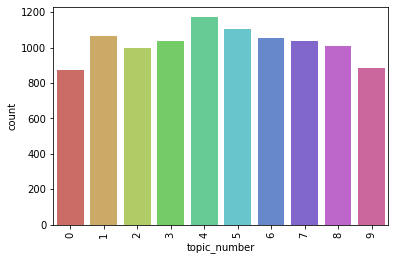

In [81]:
import seaborn as sb
def create_distribution(dataFile):
    g = sb.countplot(x='topic_number', data=dataFile, palette='hls')
    g.set_xticklabels(g.get_xticklabels(),rotation=90)

    return g

create_distribution(data_train) # TRAIN Document Vector

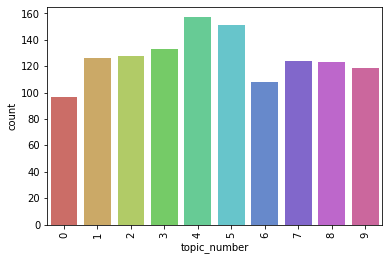

In [82]:
create_distribution(data_test)

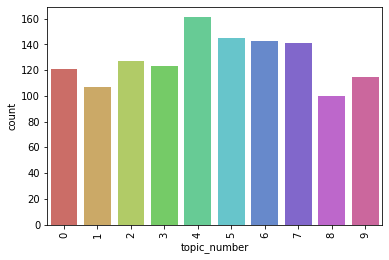

In [83]:
create_distribution(data_valid)

In [84]:
data_train.to_csv("train_lda.csv", sep=',')
data_test.to_csv("test_lda.csv", sep=',')
data_valid.to_csv("valid_lda.csv", sep=',')

In [85]:
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.linear_model import  LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem.porter import *
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

class LDATopicModelling():

    def __init__(self):        

        columnNames = ["jsonid", "label", "headline_text", "subject", "speaker", "speaker_job_title", "state_info", "party_affiliation", "barely_true_counts", "false_counts", "half_true_counts", "mostly_true_counts", "pants_on_fire_counts", "context","clean", "sentiment_vector","vader_polarity", "sentiment_score", "index", "topic_number", "lda_score", "topic_top_words"]
        dataTrain = pd.read_csv('train_lda.csv', sep=',', header=None, names = columnNames)
        dataTest = pd.read_csv('test_lda.csv', sep=',', header=None, names = columnNames)

        #dropping columns
        columnsToRemove = ['jsonid', 'label', 'subject', 'speaker','speaker_job_title', 'state_info', 'party_affiliation', 'barely_true_counts', 'false_counts', 'half_true_counts', 'mostly_true_counts', 'pants_on_fire_counts', 'context', 'sentiment_vector', 'sentiment_vector','vader_polarity', 'sentiment_score', 'index']
        dataTrain = dataTrain.drop(columns=columnsToRemove)
        dataTest = dataTest.drop(columns=columnsToRemove)
        dataTrain = dataTrain.loc[1:] 
        dataTest = dataTest.loc[1:]
    
    
        tfidfV = TfidfVectorizer(stop_words='english', min_df=0.3, max_df=0.8, use_idf=True, smooth_idf=True, token_pattern=u'(?ui)\\b\\w*[a-z]+\\w*\\b')

        self.logR_pipeline = Pipeline([
                ('LogRCV', tfidfV),
                ('LogR_clf',LogisticRegression(solver='liblinear', C=32/100))
                ])
        self.logR_pipeline.fit(dataTrain['headline_text'],dataTrain['topic_number'])
        predicted_LogR = self.logR_pipeline.predict(dataTest['headline_text'])
        score = metrics.accuracy_score(dataTest['topic_number'], predicted_LogR)
        print("LDA Topic Model Trained - accuracy:   %0.6f" % score)
        

    def predict(self, text):
        predicted = self.logR_pipeline.predict([text])
        predicedProb = self.logR_pipeline.predict_proba([text])[:,1]
        return bool(predicted), float(predicedProb)

In [86]:
ldaTopicModelling = LDATopicModelling()

LDA Topic Model Trained - accuracy:   0.124013


In [87]:
def DataMarvels_getLDATopicModellingScore(text):  # return between 0 and 1, being 0 = True,  1 = Fake
    binaryValue, probValue = ldaTopicModelling.predict(text)
    return (float(probValue))

print(DataMarvels_getLDATopicModellingScore("Says the Annies List political group supports third-trimester abortions on demand."))

0.09884154184718022


**Fake_News_Detection**

In [88]:
# concatenate validation data with training data
data_train = pd.concat([data_valid])

In [89]:
# merge '' and 'justification' column
data_train['new'] = data_train['headline_text'].map(str) + data_train['context'].map(str)

In [90]:
data_train['new'].iloc[0:1].values

array(['When Obama was sworn into office, he DID NOT use the Holy Bible, but instead the Kuran (Their equivalency to our Bible, but very different beliefs).nan'],
      dtype=object)

**Build Bag-Of-Words model using CountVectorizer and TfidfVectorizer.**

In [91]:
# Convert text to word count vectors with CountVectorizer
# create the transform
cvec = CountVectorizer()

# tokenize, build vocab and encode training data
data_train_cvec = cvec.fit_transform(data_train['new'].values)

# summarize
print(cvec.vocabulary_)
# print(cvec.get_feature_names())

{'when': 4581, 'obama': 2961, 'was': 4535, 'sworn': 4142, 'into': 2281, 'office': 2982, 'he': 2043, 'did': 1345, 'not': 2936, 'use': 4439, 'the': 4230, 'holy': 2109, 'bible': 594, 'but': 742, 'instead': 2260, 'kuran': 2433, 'their': 4232, 'equivalency': 1578, 'to': 4270, 'our': 3043, 'very': 4466, 'different': 1353, 'beliefs': 577, 'nan': 2857, 'says': 3743, 'having': 2037, 'organizations': 3034, 'parading': 3099, 'as': 440, 'being': 576, 'social': 3928, 'welfare': 4569, 'and': 369, 'then': 4235, 'involved': 2299, 'in': 2194, 'political': 3249, 'combat': 986, 'harkens': 2023, 'back': 499, 'why': 4595, 'statute': 4037, 'hundred': 2140, 'years': 4657, 'ago': 296, 'said': 3714, 'that': 4224, 'they': 4240, 'were': 4573, 'prohibited': 3361, 'ways': 4549, 'means': 2697, 'hearing': 2053, 'nearly': 2881, 'half': 2008, 'of': 2974, 'oregons': 3031, 'children': 889, 'are': 421, 'poor': 3261, 'an': 367, 'opinion': 3010, 'article': 439, 'on': 2994, 'attacks': 463, 'by': 746, 'republicans': 3585, 'v

In [92]:
# summarize encoded vector
print(data_train_cvec.shape)
print(type(data_train_cvec))
print(data_train_cvec.toarray())

(1283, 4680)
<class 'scipy.sparse.csr.csr_matrix'>
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [93]:
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
from scipy.sparse.csr import csr_matrix
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import  LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve
from sklearn.metrics import confusion_matrix, f1_score, classification_report
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn import svm

In [94]:
# Calculate inverse document frequencies
# create the transform
tfidf_vec = TfidfTransformer()

# tokenize, build vocab and encode training data
data_train_tfidf_vec = tfidf_vec.fit_transform(data_train_cvec)

In [95]:
# tfidf score
tfidf_vec.transform(data_train_cvec)

<1283x4680 sparse matrix of type '<class 'numpy.float64'>'
	with 25033 stored elements in Compressed Sparse Row format>

In [96]:
# summarize encoded vector
print(data_train_tfidf_vec.shape)
print(data_train_tfidf_vec.toarray())

(1283, 4680)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [97]:
# tfidf + ngrams
tfidf_vectorizer = TfidfVectorizer(stop_words='english', ngram_range=(1,2), use_idf=True, smooth_idf=True)
tfidf_vectorizer_vectors = tfidf_vectorizer.fit_transform(data_train['new'].values)

In [98]:
# print(tfidf_ngram.toarray())
# tfidf.vocabulary_
first_vector_tfidfvectorizer = tfidf_vectorizer_vectors[0]


# place tf-idf values in a pandas data frame
df = pd.DataFrame(first_vector_tfidfvectorizer.T.todense(), index=tfidf_vectorizer.get_feature_names(), columns=["tfidf"])
df.sort_values(by=["tfidf"],ascending=False)

,tfidf
bible,0.396647
kuran equivalency,0.198324
equivalency,0.198324
office did,0.198324
instead kuran,0.198324
...,...
explore,0.000000
explore state,0.000000
explorer,0.000000
explorer tweet,0.000000


In [99]:
nltk.download('treebank')
nltk.download('universal_tagset')

[nltk_data] Downloading package treebank to /root/nltk_data...
[nltk_data]   Unzipping corpora/treebank.zip.
[nltk_data] Downloading package universal_tagset to /root/nltk_data...
[nltk_data]   Unzipping taggers/universal_tagset.zip.


True

In [100]:
# POS tagging using CRF
tagged_sentence = nltk.corpus.treebank.tagged_sents(tagset='universal')
# print(len(tagged_sentence))

In [101]:
# load training sentences
training_sentences = data_train['new']
# print(training_sentences)

In [102]:
# function to extract features from dataset
def features(sentence, index):
  #returns a dictionary containing extracted features
  return {
      'is_first_capital': int(sentence[index][0].isupper()),
      'is_first_word': int(index==0),
      'is_last_word': int(index==len(sentence)-1),
      'is_complete_capital': int(sentence[index].upper()==sentence[index]),
      'is_complete_lower': int(sentence[index].lower()==sentence[index]),
      'prev_word':'' if index==0 else sentence[index-1],
      'next_word':'' if index==len(sentence)-1 else sentence[index+1],
      'is_numeric': int(sentence[index].isdigit()),
      'is_alphanumeric': int(bool((re.match('^(?=.*[0-9]$)(?=.*[a-zA-Z])',sentence[index])))),
      'prefix_1': sentence[index][0],
      'prefix_2': sentence[index][:2],
      'prefic_3': sentence[index][:3],
      'prefix_4': sentence[index][:4],
      'suffix_1': sentence[index][-1],
      'suffix_2': sentence[index][-2:],
      'suffix_3': sentence[index][-3:],
      'suffix_4': sentence[index][-4:],
      'word_has_hyphen': 1 if '-' in sentence[index] else 0
  }

In [103]:
# function to strip tags from tagged corpus
def untag(sentence):
  return [word for word,tag in sentence]

**Training models with word-count-vectors from CountVectorizer method**

In [104]:
# using LogisticRegression
logReg_pipeline_cv = Pipeline([
    ('LogRCV', cvec),
    ('LogR_model', LogisticRegression())
])

logReg_pipeline_cv.fit(data_train['new'], data_train['label'])
predictions_logReg = logReg_pipeline_cv.predict(data_test['headline_text'])
logReg_cv = np.mean(predictions_logReg == data_test['label'])

# using SVM
svm_pipeline_cv = Pipeline([
    ('svmCV', cvec),
    ('svm_model', svm.LinearSVC())
])

svm_pipeline_cv.fit(data_train['new'], data_train['label'])
predictions_svm = svm_pipeline_cv.predict(data_test['headline_text'])
svm_cv = np.mean(predictions_svm == data_test['label'])

# using naive bayes
nb_pipeline_cv = Pipeline([
    ('nbCV', cvec),
    ('nb_model', MultinomialNB())
])

nb_pipeline_cv.fit(data_train['new'], data_train['label'])
predictions_nb = nb_pipeline_cv.predict(data_test['headline_text'])
nb_cv = np.mean(predictions_nb == data_test['label'])

# using random forest
rf_pipeline_cv = Pipeline([
    ('rfCV', cvec),
    ('rf_model', RandomForestClassifier(n_estimators=400, n_jobs=4))
])

rf_pipeline_cv.fit(data_train['new'], data_train['label'])
predictions_rf = rf_pipeline_cv.predict(data_test['headline_text'])
rf_cv = np.mean(predictions_rf == data_test['label'])

In [105]:
print(logReg_cv)
print(svm_cv)
print(nb_cv)
print(rf_cv)

0.22511848341232227
0.21721958925750395
0.24881516587677724
0.2330173775671406


In [106]:
def kFoldCV(model):
  k_fold = KFold(n_splits=5)
  scores = []
  conf_matrix = np.zeros(shape=(6,6))
  
  for train_index, test_index in k_fold.split(data_train['new']):
    trainText = data_train.iloc[train_index]['new']
    train_y = data_train.iloc[train_index]['label']
    
    testText = data_train.iloc[test_index]['new']
    test_y = data_train.iloc[test_index]['label']
    
    model.fit(trainText, train_y)
    pred_y = model.predict(testText)
    
    conf_matrix += confusion_matrix(test_y, pred_y)
    scores.append(f1_score(test_y, pred_y, average='micro'))
    
  return (print('Total headlines text classified:', len(data_train)),
         print('Score:', sum(scores)/len(scores)),
         print('Confusion Matrix:'),
         print(conf_matrix),
         print("---------------------------------------------------"))

In [107]:
kFoldCV(logReg_pipeline_cv)
kFoldCV(svm_pipeline_cv)
kFoldCV(nb_pipeline_cv)
kFoldCV(rf_pipeline_cv)

Total headlines text classified: 1283
Score: 0.23694370136186768
Confusion Matrix:
[[52. 54. 46. 52.  7. 25.]
 [40. 79. 56. 53. 14. 21.]
 [48. 51. 57. 59.  7. 26.]
 [36. 47. 55. 79.  3. 31.]
 [14. 42. 17. 22. 12.  9.]
 [21. 32. 39. 45.  7. 25.]]
---------------------------------------------------
Total headlines text classified: 1283
Score: 0.23149623054474708
Confusion Matrix:
[[57. 50. 47. 43. 12. 27.]
 [39. 73. 48. 49. 23. 31.]
 [53. 44. 61. 55.  7. 28.]
 [32. 51. 51. 70.  9. 38.]
 [13. 37. 20. 21. 14. 11.]
 [23. 39. 31. 44. 10. 22.]]
---------------------------------------------------
Total headlines text classified: 1283
Score: 0.2400656614785992
Confusion Matrix:
[[ 54.  36.  68.  70.   0.   8.]
 [ 48.  68.  66.  75.   3.   3.]
 [ 40.  49.  71.  82.   0.   6.]
 [ 39.  34.  70. 103.   0.   5.]
 [ 14.  36.  32.  31.   1.   2.]
 [ 19.  21.  52.  64.   2.  11.]]
---------------------------------------------------
Total headlines text classified: 1283
Score: 0.22603356031128402
Confus

(None, None, None, None, None)

In [108]:
# using LogisticRegression
logReg_pipeline_ngram = Pipeline([
    ('LogR_tfidf', tfidf_vectorizer),
    ('LogR_model', LogisticRegression())
])

logReg_pipeline_ngram.fit(data_train['new'], data_train['label'])
predictions_logReg_ngram = logReg_pipeline_ngram.predict(data_test['headline_text'])
logReg_ngram = np.mean(predictions_logReg_ngram == data_test['label'])

# using SVM
svm_pipeline_ngram = Pipeline([
    ('svmCV', tfidf_vectorizer),
    ('svm_model', svm.LinearSVC())
])

svm_pipeline_ngram.fit(data_train['new'], data_train['label'])
predictions_svm = svm_pipeline_ngram.predict(data_test['headline_text'])
svm_ngram = np.mean(predictions_svm == data_test['label'])

# using naive bayes
nb_pipeline_ngram = Pipeline([
    ('nbCV', tfidf_vectorizer),
    ('nb_model', MultinomialNB())
])

nb_pipeline_ngram.fit(data_train['new'], data_train['label'])
predictions_nb = nb_pipeline_ngram.predict(data_test['headline_text'])
nb_ngram = np.mean(predictions_nb == data_test['label'])

# using random forest
rf_pipeline_ngram = Pipeline([
    ('rfCV', tfidf_vectorizer),
    ('rf_model', RandomForestClassifier(n_estimators=400, n_jobs=4))
])

rf_pipeline_ngram.fit(data_train['new'], data_train['label'])
predictions_rf = rf_pipeline_ngram.predict(data_test['headline_text'])
rf_ngram = np.mean(predictions_rf == data_test['label'])

In [109]:
print(logReg_ngram)
print(svm_ngram)
print(nb_ngram)
print(rf_ngram)

0.22748815165876776
0.21879936808846762
0.23933649289099526
0.22432859399684044


In [110]:
kFoldCV(logReg_pipeline_ngram)
kFoldCV(svm_pipeline_ngram)
kFoldCV(nb_pipeline_ngram)
kFoldCV(rf_pipeline_ngram)

Total headlines text classified: 1283
Score: 0.22835299124513622
Confusion Matrix:
[[ 36.  75.  58.  64.   1.   2.]
 [ 37. 114.  43.  64.   2.   3.]
 [ 44.  71.  53.  76.   0.   4.]
 [ 38.  64.  60.  86.   0.   3.]
 [ 11.  56.  24.  21.   3.   1.]
 [ 18.  41.  46.  63.   0.   1.]]
---------------------------------------------------
Total headlines text classified: 1283
Score: 0.24085603112840465
Confusion Matrix:
[[48. 44. 68. 54.  6. 16.]
 [46. 86. 48. 54. 15. 14.]
 [54. 58. 56. 62.  5. 13.]
 [47. 49. 50. 80.  3. 22.]
 [14. 35. 25. 15. 22.  5.]
 [26. 32. 39. 49.  6. 17.]]
---------------------------------------------------
Total headlines text classified: 1283
Score: 0.23537512159533075
Confusion Matrix:
[[ 34.  85.  56.  61.   0.   0.]
 [ 31. 122.  48.  62.   0.   0.]
 [ 36.  83.  53.  76.   0.   0.]
 [ 30.  76.  52.  93.   0.   0.]
 [  8.  65.  22.  21.   0.   0.]
 [ 17.  49.  41.  62.   0.   0.]]
---------------------------------------------------
Total headlines text classified: 1

(None, None, None, None, None)